In [24]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [25]:
#prepare the dataset
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=10.0, random_state=42)

In [26]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

In [27]:
n_samples, n_features = X.shape

In [28]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [29]:
learning_rate = 0.01
n_iters = 100

In [30]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate )

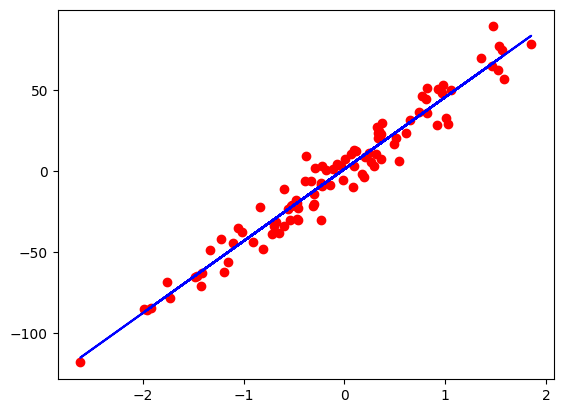

In [34]:
for epoch in range(n_iters):
    y_predict = model(X)

    loss = criterion(y_predict, y)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

    if epoch+1 % 10 == 0: 
        print(f'epoch: {epoch} /t')
        print(f'loss: {loss.item():.4f} /t')


#plot
predicted = model(X).detach()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()
